In [53]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
tel_data= pd.read_csv('/content/telecom_churn_dataset.csv')
tel_data

,customer_id,gender,age,marital_status,dependents,contract_type,internet_service,phone_service,multiple_lines,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,call_duration_minutes,latitude,longitude,churn_status
0,5675,Female,60,Single,1,Yearly,Fiber Optic,Yes,Yes,No,...,Yes,Yes,No,Yes,67.82,304.67,586,5.241592,-115.303093,No
1,10982,Female,56,Single,0,Monthly,DSL,No,Yes,Yes,...,No,Yes,Yes,No,92.70,168.76,75,55.369917,125.898674,No
2,11743,Male,24,Married,3,Yearly,DSL,No,Yes,Yes,...,No,Yes,No,Yes,90.22,96.61,931,16.710648,48.450920,No
3,12203,Female,63,Married,1,Monthly,DSL,No,Yes,No,...,No,No,Yes,No,70.24,729.03,645,0.558483,144.501355,No
4,12517,Male,66,Single,1,Yearly,DSL,No,Yes,Yes,...,No,No,Yes,Yes,21.42,813.48,509,32.928352,-129.364290,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,992302,Female,35,Married,1,Monthly,Fiber Optic,Yes,Yes,Yes,...,No,No,No,No,69.94,838.09,110,80.340747,-16.083598,No
496,993819,Female,30,Married,0,Yearly,DSL,No,Yes,No,...,No,Yes,No,Yes,26.57,206.29,281,9.588895,-157.296637,No
497,994126,Male,62,Single,0,Yearly,Fiber Optic,No,Yes,No,...,Yes,No,Yes,Yes,17.19,523.34,121,78.324411,-45.868644,Yes
498,998448,Male,34,Single,0,Yearly,Fiber Optic,No,No,No,...,Yes,Yes,Yes,No,18.91,595.48,492,-42.462827,-147.545685,No


In [56]:
tel_data.head()

,customer_id,gender,age,marital_status,dependents,contract_type,internet_service,phone_service,multiple_lines,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,call_duration_minutes,latitude,longitude,churn_status
0,5675,Female,60,Single,1,Yearly,Fiber Optic,Yes,Yes,No,...,Yes,Yes,No,Yes,67.82,304.67,586,5.241592,-115.303093,No
1,10982,Female,56,Single,0,Monthly,DSL,No,Yes,Yes,...,No,Yes,Yes,No,92.70,168.76,75,55.369917,125.898674,No
2,11743,Male,24,Married,3,Yearly,DSL,No,Yes,Yes,...,No,Yes,No,Yes,90.22,96.61,931,16.710648,48.450920,No
3,12203,Female,63,Married,1,Monthly,DSL,No,Yes,No,...,No,No,Yes,No,70.24,729.03,645,0.558483,144.501355,No
4,12517,Male,66,Single,1,Yearly,DSL,No,Yes,Yes,...,No,No,Yes,Yes,21.42,813.48,509,32.928352,-129.364290,No


In [58]:
tel_data.shape

(500, 21)

In [59]:
tel_data.columns.values

array(['customer_id', 'gender', 'age', 'marital_status', 'dependents',
       'contract_type', 'internet_service', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'monthly_charges', 'total_charges',
       'call_duration_minutes', 'latitude', 'longitude', 'churn_status'],
      dtype=object)

In [60]:
tel_data.dtypes

customer_id                int64
gender                    object
age                        int64
marital_status            object
dependents                 int64
contract_type             object
internet_service          object
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
monthly_charges          float64
total_charges            float64
call_duration_minutes      int64
latitude                 float64
longitude                float64
churn_status              object
dtype: object

In [62]:
tel_data.drop(['customer_id','latitude','longitude'],axis=1,inplace= True)

In [63]:
tel_data.describe()

,age,dependents,monthly_charges,total_charges,call_duration_minutes
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,47.402000,1.436000,50.33858,491.103620,593.942000
std,17.635828,1.108314,29.20579,290.346823,350.978202
min,18.000000,0.000000,0.18000,1.710000,1.000000
25%,32.000000,0.000000,25.74000,235.170000,291.750000
50%,46.000000,1.000000,50.65000,494.710000,591.000000
75%,63.000000,2.000000,72.96250,735.805000,898.500000
max,77.000000,3.000000,99.88000,998.210000,1199.000000


The average age of the customers are 47.4, we have 25% mid-age customers i.e, 32 years, and 75% of senior citizens i.e, 77.

Average monthly charges are 50.34 USD whereas 25% of the customers pay only half of the average value i.e, 25.74 USD.

75% Customers are our highest revenue contributors.

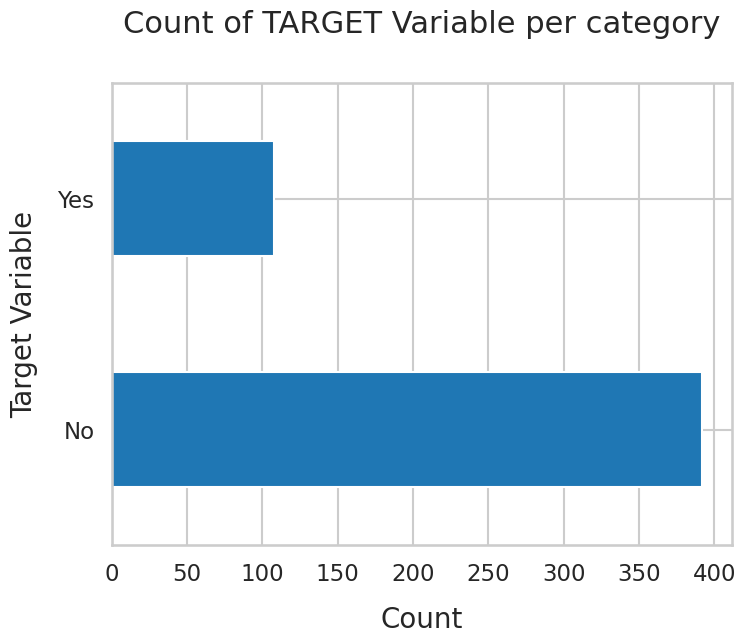

In [64]:
tel_data['churn_status'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [65]:
#Ratio in percentage
100*tel_data['churn_status'].value_counts()/len(tel_data['churn_status'])


No     78.4
Yes    21.6
Name: churn_status, dtype: float64

In [66]:
tel_data['churn_status'].value_counts()


No     392
Yes    108
Name: churn_status, dtype: int64



*   Data is highly imbalanced,ratio = 78:22
*   Hence, the data can be analysed individually with other features, to get some insights



In [67]:
#Summary of the data through verbose=True
tel_data.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 500 non-null    object 
 1   age                    500 non-null    int64  
 2   marital_status         500 non-null    object 
 3   dependents             500 non-null    int64  
 4   contract_type          500 non-null    object 
 5   internet_service       500 non-null    object 
 6   phone_service          500 non-null    object 
 7   multiple_lines         500 non-null    object 
 8   online_security        500 non-null    object 
 9   online_backup          500 non-null    object 
 10  device_protection      500 non-null    object 
 11  tech_support           500 non-null    object 
 12  streaming_tv           500 non-null    object 
 13  streaming_movies       500 non-null    object 
 14  monthly_charges        500 non-null    float64
 15  total_

There is no null value present in the dataset. To further verify, Data cleaning can be performed.

In [69]:
tel_churn = tel_data.copy()


In [70]:
tel_churn.isnull().sum()

gender                   0
age                      0
marital_status           0
dependents               0
contract_type            0
internet_service         0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
monthly_charges          0
total_charges            0
call_duration_minutes    0
churn_status             0
dtype: int64

As the data is clean and can be proceeded further for deriving insights.

#**DATA EXPLORATION**
1. Plot distribution of individual predictors by churn

###Univariate Analysis

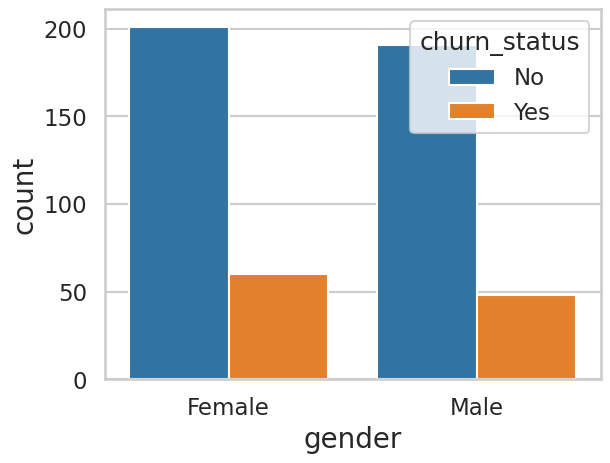

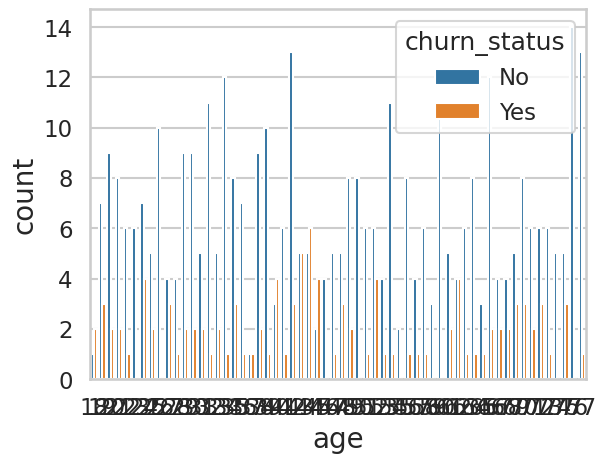

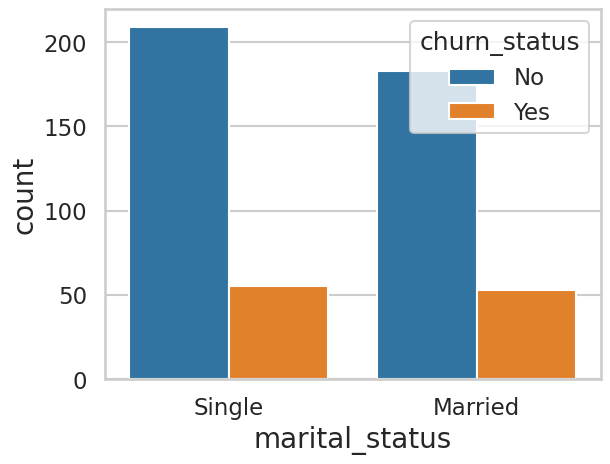

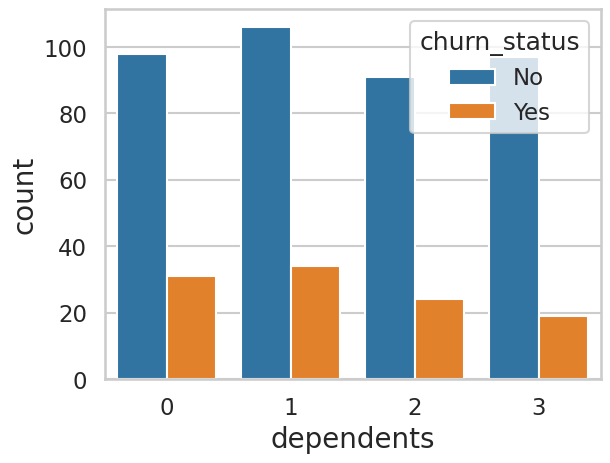

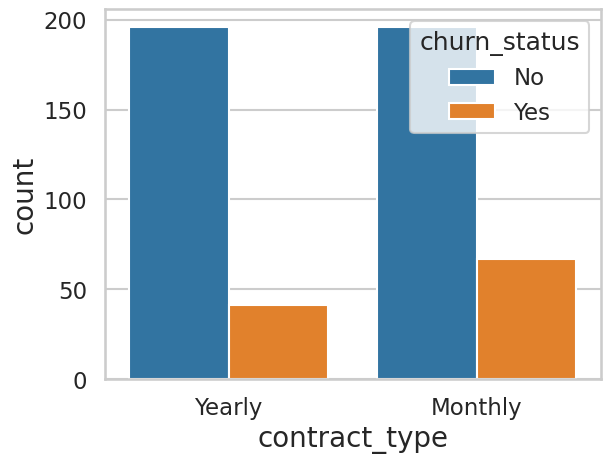

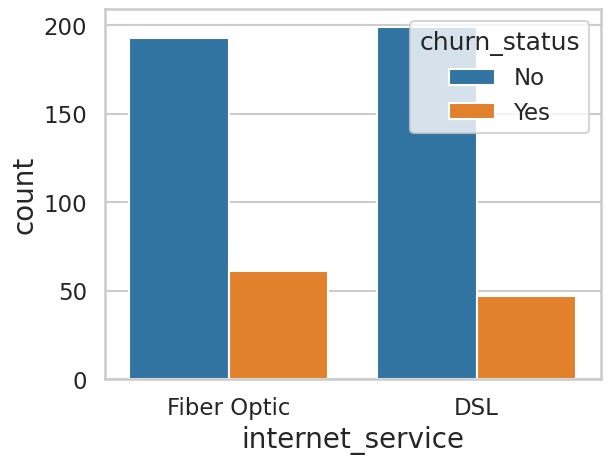

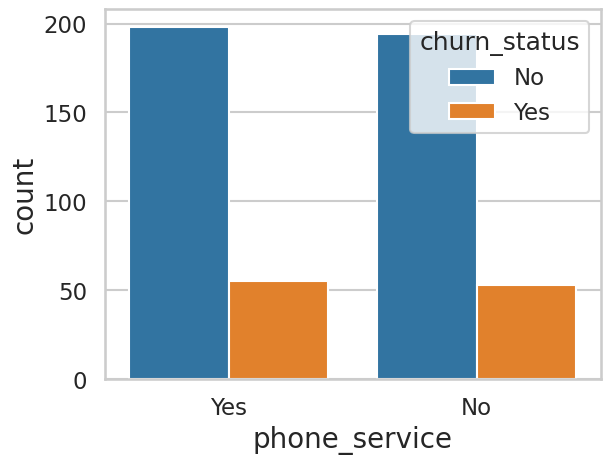

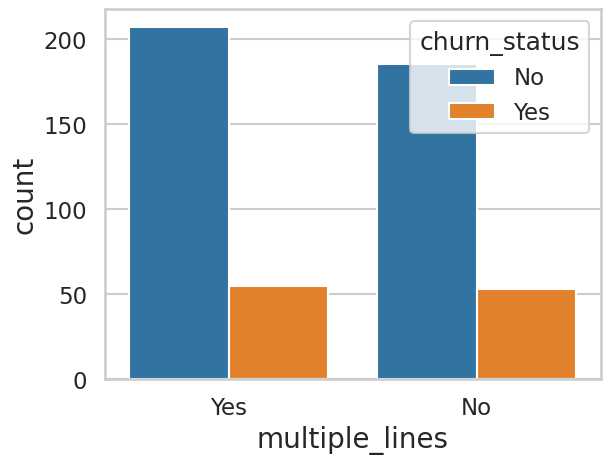

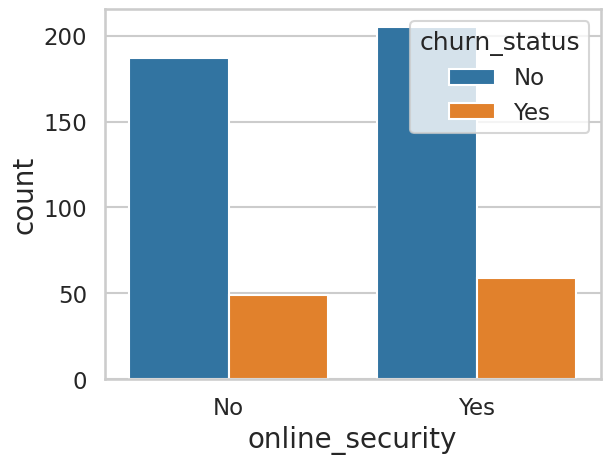

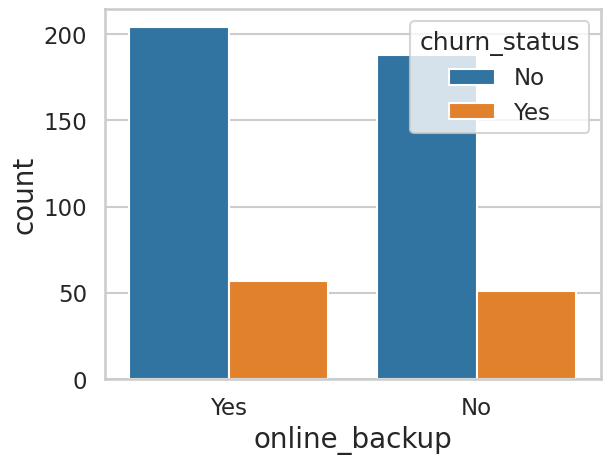

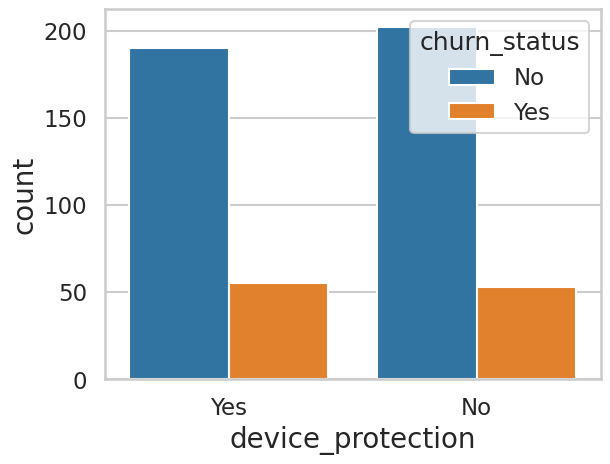

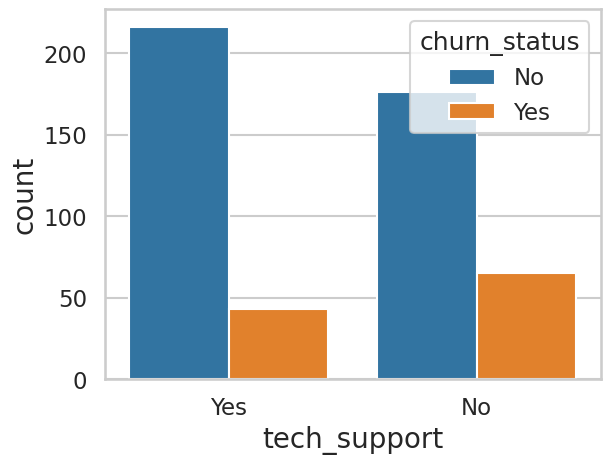

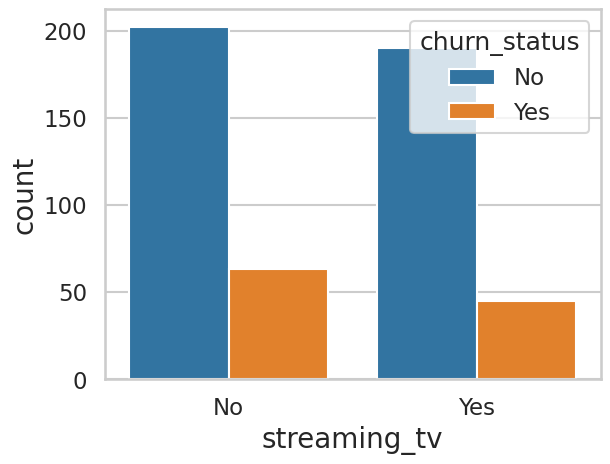

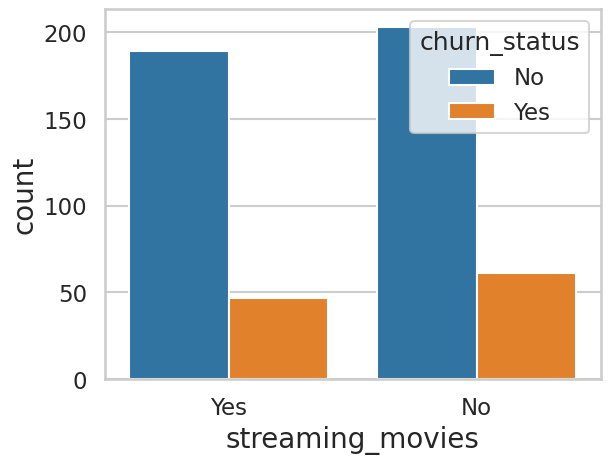

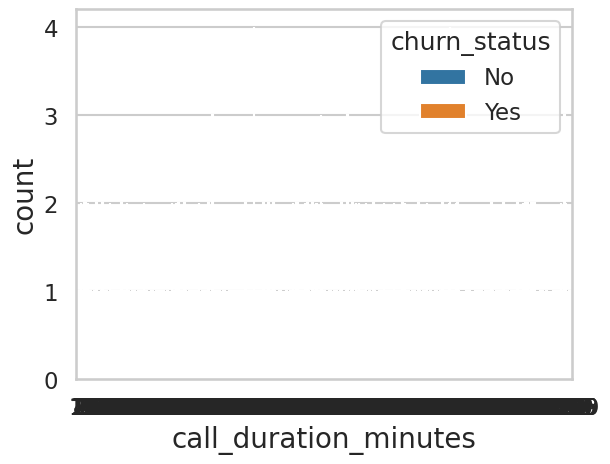

In [71]:
for i, predictor in enumerate(tel_churn.drop(columns=['churn_status', 'total_charges', 'monthly_charges'])):
    plt.figure(i)
    sns.countplot(data=tel_churn, x=predictor, hue='churn_status')

2.Convert the target variable 'churn_status' in a binary numeric variable i.e, Yes=1, No=0

In [72]:
tel_churn['churn_status'] = np.where(tel_churn.churn_status == 'Yes',1,0)
tel_churn

,gender,age,marital_status,dependents,contract_type,internet_service,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,call_duration_minutes,churn_status
0,Female,60,Single,1,Yearly,Fiber Optic,Yes,Yes,No,Yes,Yes,Yes,No,Yes,67.82,304.67,586,0
1,Female,56,Single,0,Monthly,DSL,No,Yes,Yes,Yes,No,Yes,Yes,No,92.70,168.76,75,0
2,Male,24,Married,3,Yearly,DSL,No,Yes,Yes,Yes,No,Yes,No,Yes,90.22,96.61,931,0
3,Female,63,Married,1,Monthly,DSL,No,Yes,No,Yes,No,No,Yes,No,70.24,729.03,645,0
4,Male,66,Single,1,Yearly,DSL,No,Yes,Yes,No,No,No,Yes,Yes,21.42,813.48,509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Female,35,Married,1,Monthly,Fiber Optic,Yes,Yes,Yes,No,No,No,No,No,69.94,838.09,110,0
496,Female,30,Married,0,Yearly,DSL,No,Yes,No,Yes,No,Yes,No,Yes,26.57,206.29,281,0
497,Male,62,Single,0,Yearly,Fiber Optic,No,Yes,No,No,Yes,No,Yes,Yes,17.19,523.34,121,1
498,Male,34,Single,0,Yearly,Fiber Optic,No,No,No,Yes,Yes,Yes,Yes,No,18.91,595.48,492,0


3.Converting all the categorical variables into dummy variables

In [73]:
tel_churn_dummies= pd.get_dummies(tel_churn)
tel_churn_dummies

,age,dependents,monthly_charges,total_charges,call_duration_minutes,churn_status,gender_Female,gender_Male,marital_status_Married,marital_status_Single,...,online_backup_No,online_backup_Yes,device_protection_No,device_protection_Yes,tech_support_No,tech_support_Yes,streaming_tv_No,streaming_tv_Yes,streaming_movies_No,streaming_movies_Yes
0,60,1,67.82,304.67,586,0,1,0,0,1,...,0,1,0,1,0,1,1,0,0,1
1,56,0,92.70,168.76,75,0,1,0,0,1,...,0,1,1,0,0,1,0,1,1,0
2,24,3,90.22,96.61,931,0,0,1,1,0,...,0,1,1,0,0,1,1,0,0,1
3,63,1,70.24,729.03,645,0,1,0,1,0,...,0,1,1,0,1,0,0,1,1,0
4,66,1,21.42,813.48,509,0,0,1,0,1,...,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,35,1,69.94,838.09,110,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
496,30,0,26.57,206.29,281,0,1,0,1,0,...,0,1,1,0,0,1,1,0,0,1
497,62,0,17.19,523.34,121,1,0,1,0,1,...,1,0,0,1,1,0,0,1,0,1
498,34,0,18.91,595.48,492,0,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0


4. Relationship b/w Monthly and Total Charges

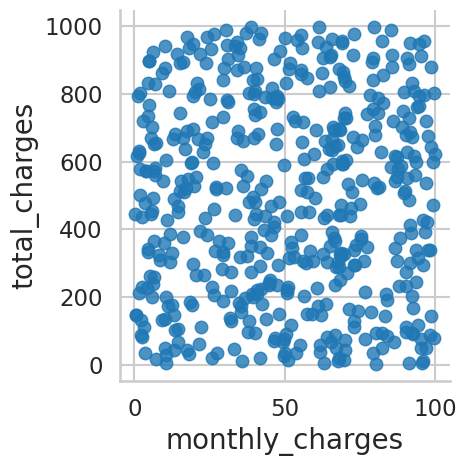

In [74]:
sns.lmplot(data=tel_churn_dummies, x='monthly_charges', y='total_charges', fit_reg=False)


As we can see,there is no specific correlation b/w monthly and total charges

5. Churn by Monthly and Total Charges

<ipython-input-75-142989a26136>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(tel_churn_dummies.monthly_charges[(tel_churn_dummies["churn_status"] == 0) ],
<ipython-input-75-142989a26136>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(tel_churn_dummies.monthly_charges[(tel_churn_dummies["churn_status"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

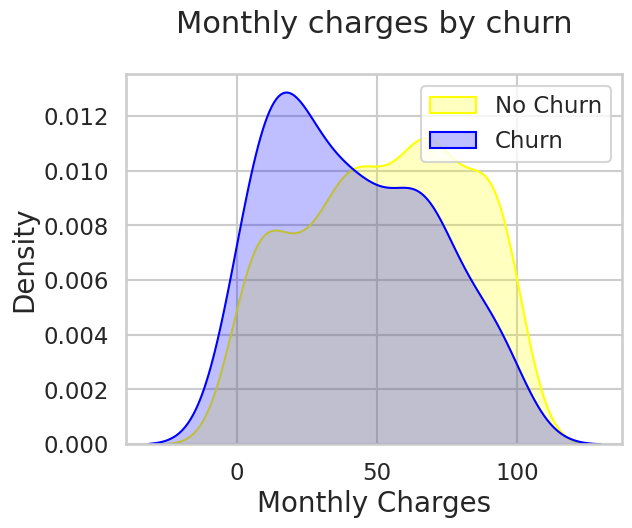

In [75]:
Mth = sns.kdeplot(tel_churn_dummies.monthly_charges[(tel_churn_dummies["churn_status"] == 0) ],
                color="Yellow", shade = True)
Mth = sns.kdeplot(tel_churn_dummies.monthly_charges[(tel_churn_dummies["churn_status"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight**: Churn is very high in lower monthly charges

<ipython-input-76-60366d37c671>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(tel_churn_dummies.total_charges[(tel_churn_dummies["churn_status"] == 0) ],
<ipython-input-76-60366d37c671>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(tel_churn_dummies.total_charges[(tel_churn_dummies["churn_status"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

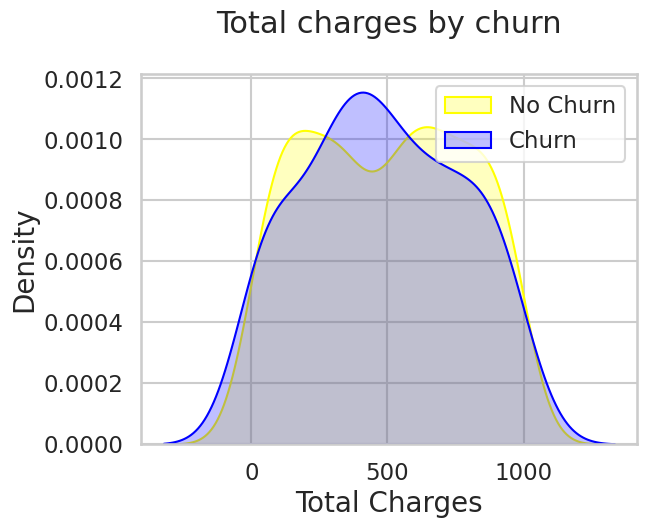

In [76]:
Tot = sns.kdeplot(tel_churn_dummies.total_charges[(tel_churn_dummies["churn_status"] == 0) ],
                color="Yellow", shade = True)
Tot = sns.kdeplot(tel_churn_dummies.total_charges[(tel_churn_dummies["churn_status"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising Insight** as higher Churn at mid Total Charges

However, if we combine the insights of 2 parameters i.e. Monthly Charges & Total Charges then the picture is a bit clear :- Higher Monthly Charge at mid-tenure results in mid higher Total Charge. Hence, **mid-level Total charges** are likely to have High Churn.

6. Building co-relation of all predictors with churn_status

<Axes: >

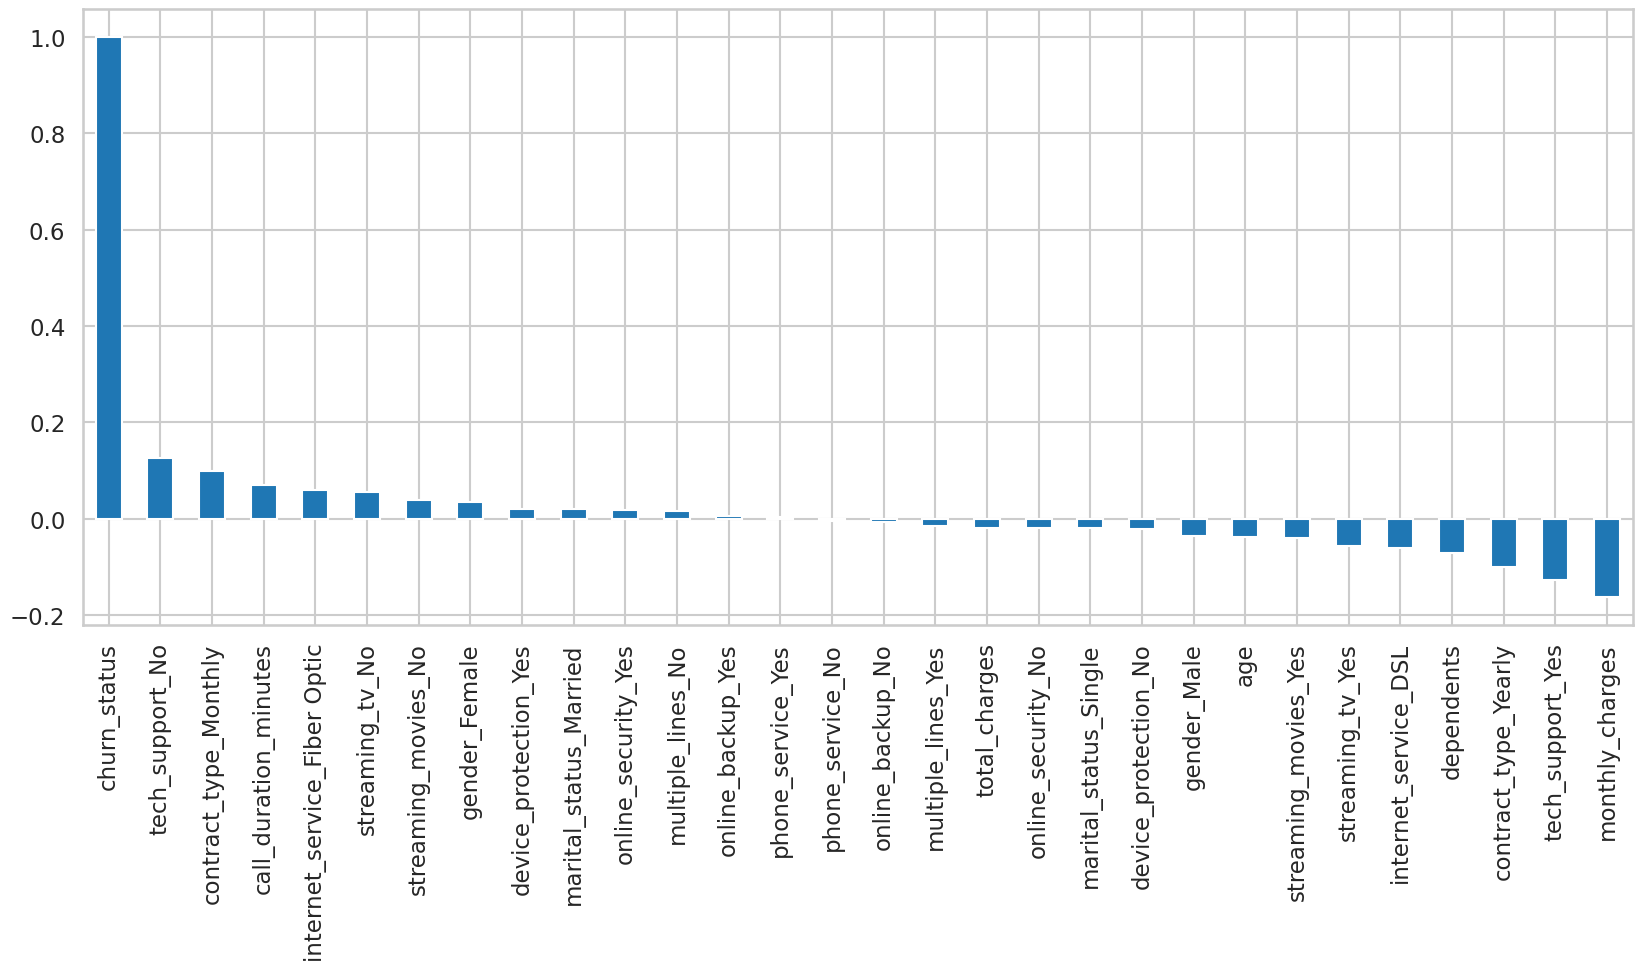

In [77]:
plt.figure(figsize=(20,8))
tel_churn_dummies.corr()['churn_status'].sort_values(ascending = False).plot(kind='bar')

**Derived Insights:**

**HIGH** Churn seen in case of **Month to month contracts, lower call duartion, No Tech support, No movie & tv subscriptions,Fibre Optics Internet, and gender_female**

**LOW** Churn is seens in case of **Higher monthly charges, with tech_support, the customers who are in yearly contract, With Movie & Tv subscription, With Internet service_DSL, and gender_male **

Factors like **Availability of PhoneService, online backup and # of multiple lines **have alomost **NO** impact on Churn

This can also be seen with a **heatmap** below.

<Axes: >

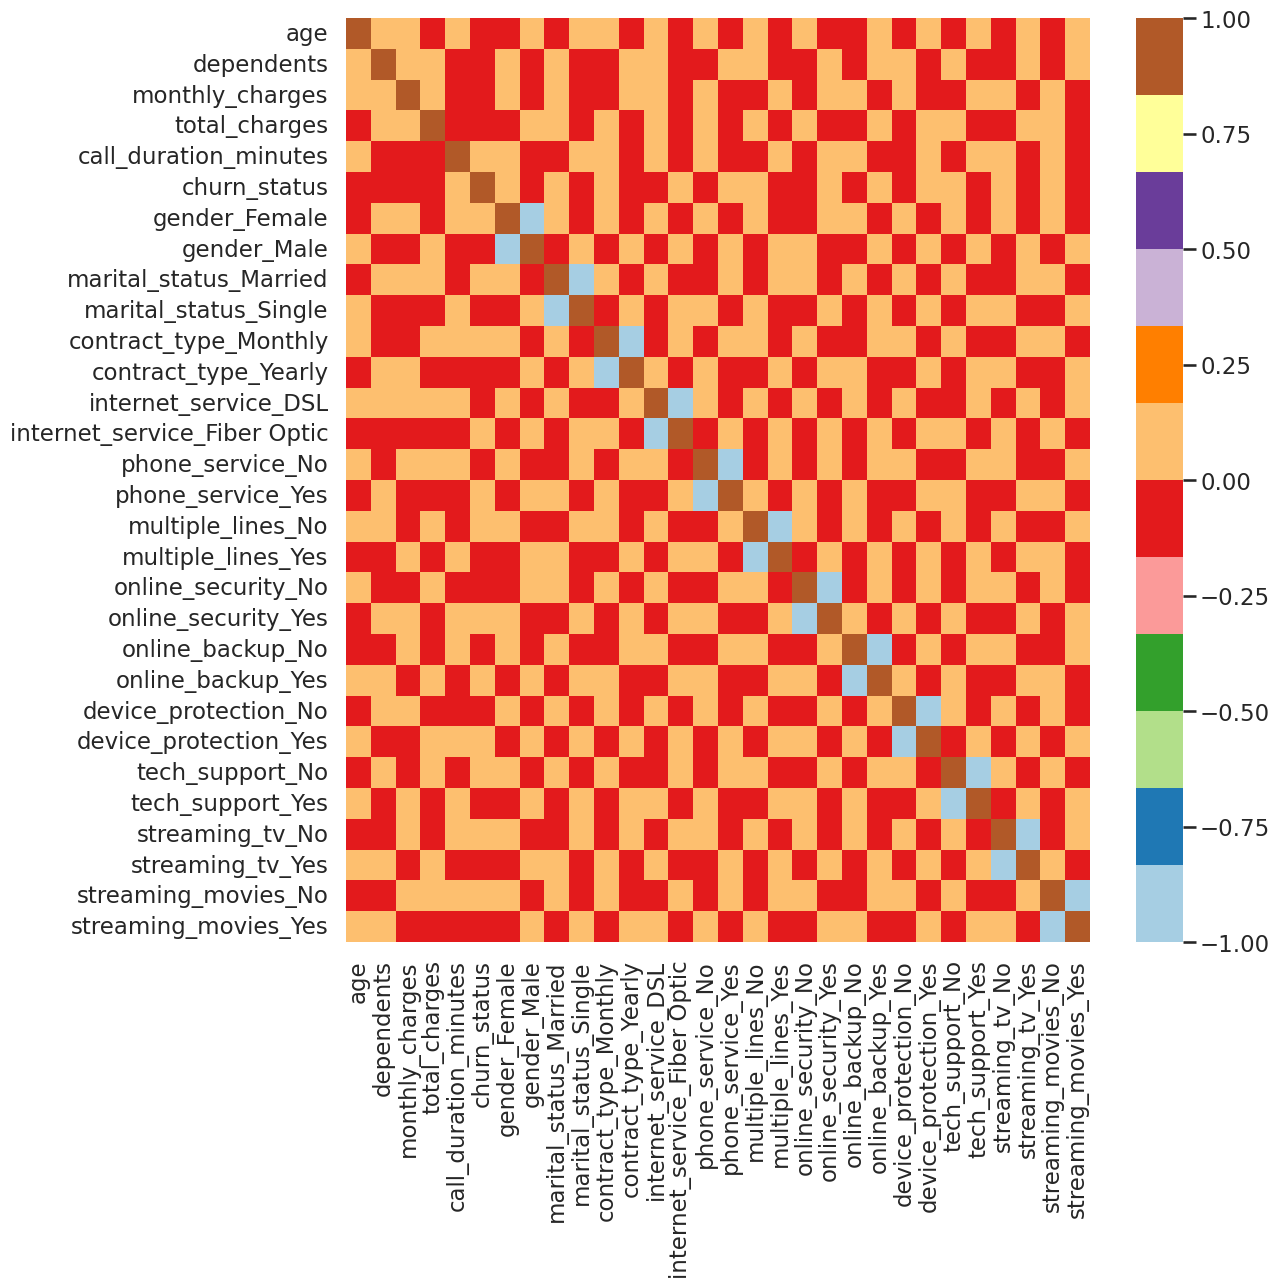

In [78]:
plt.figure(figsize=(12,12))
sns.heatmap(tel_churn_dummies.corr(), cmap="Paired")

###Bivariate Analysis

In [79]:
new_df1_target0=tel_churn.loc[tel_churn["churn_status"]==0]
new_df1_target1=tel_churn.loc[tel_churn["churn_status"]==1]


In [80]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

In [85]:
tel_churn.dtypes


gender                    object
age                        int64
marital_status            object
dependents                 int64
contract_type             object
internet_service          object
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
monthly_charges          float64
total_charges            float64
call_duration_minutes      int64
churn_status               int64
dtype: object

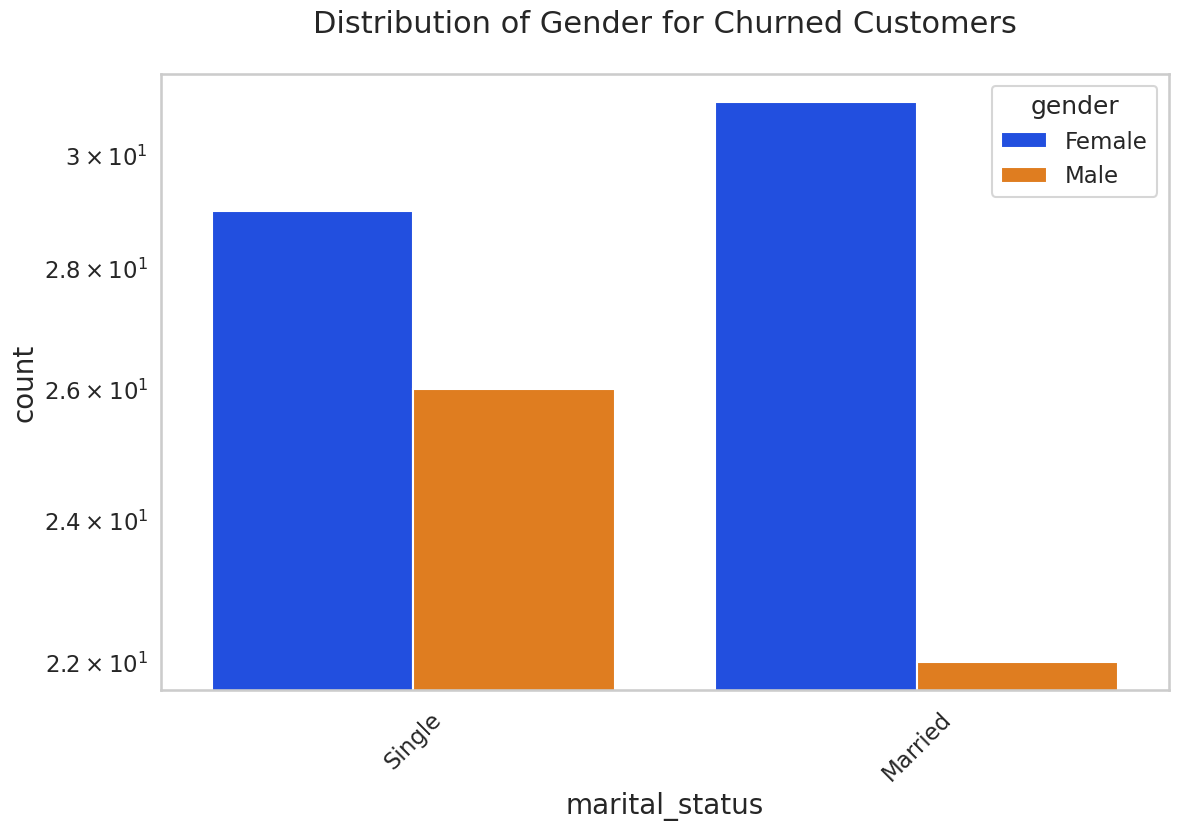

In [86]:
uniplot(new_df1_target1,col='marital_status',title='Distribution of Gender for Churned Customers',hue='gender')


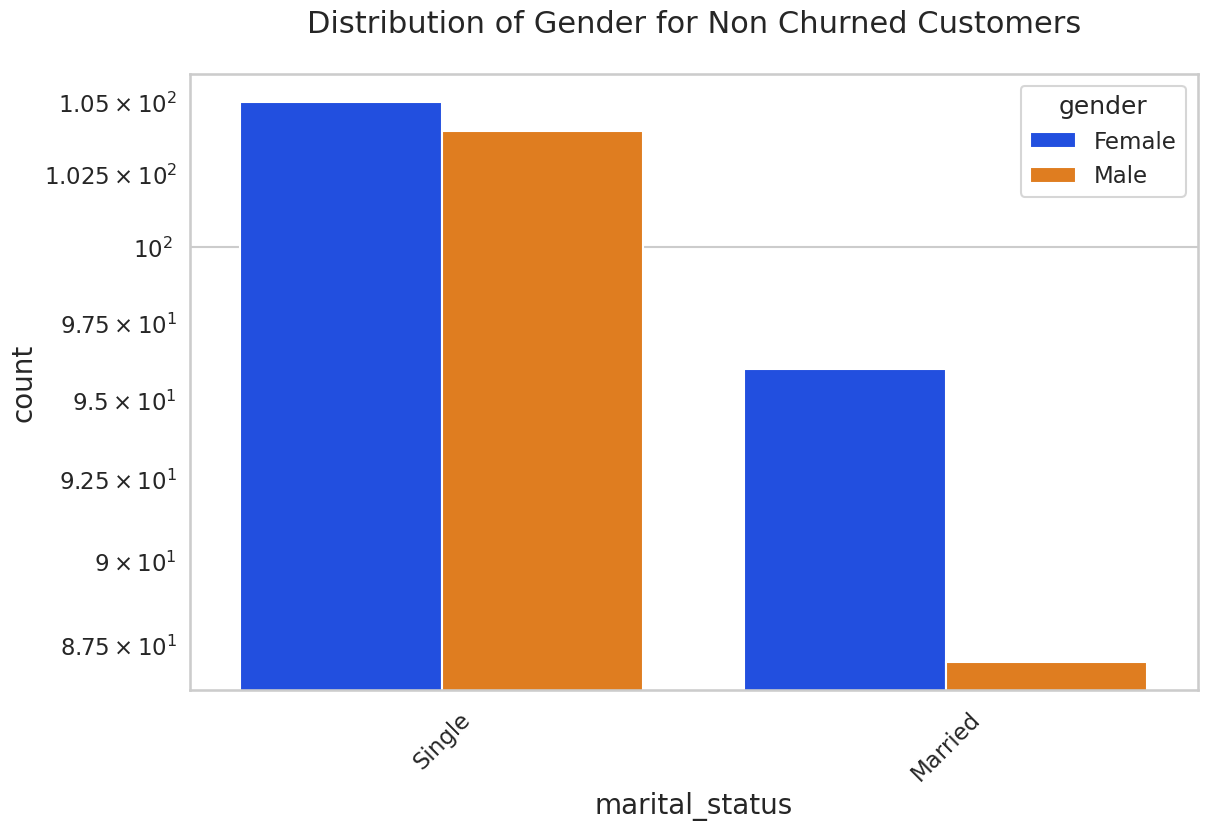

In [87]:
uniplot(new_df1_target0,col='marital_status',title='Distribution of Gender for Non Churned Customers',hue='gender')


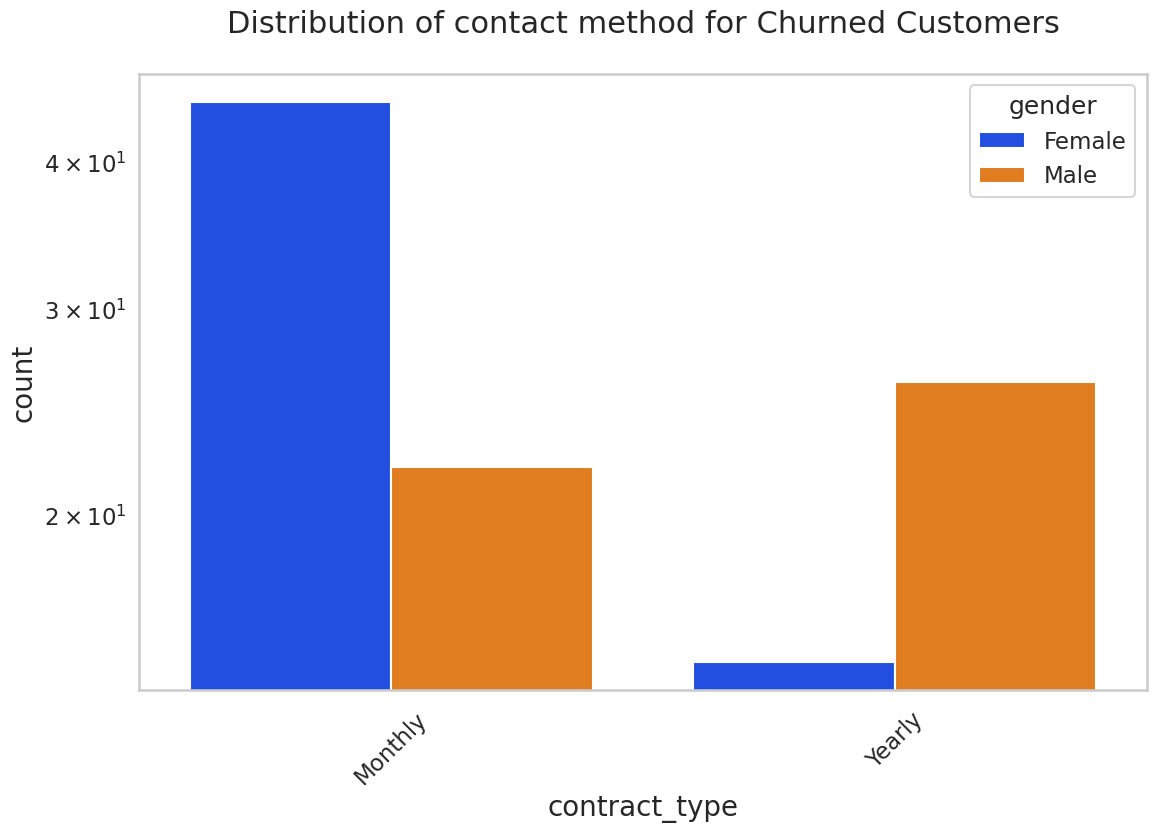

In [88]:
uniplot(new_df1_target1,col='contract_type',title='Distribution of contact method for Churned Customers',hue='gender')


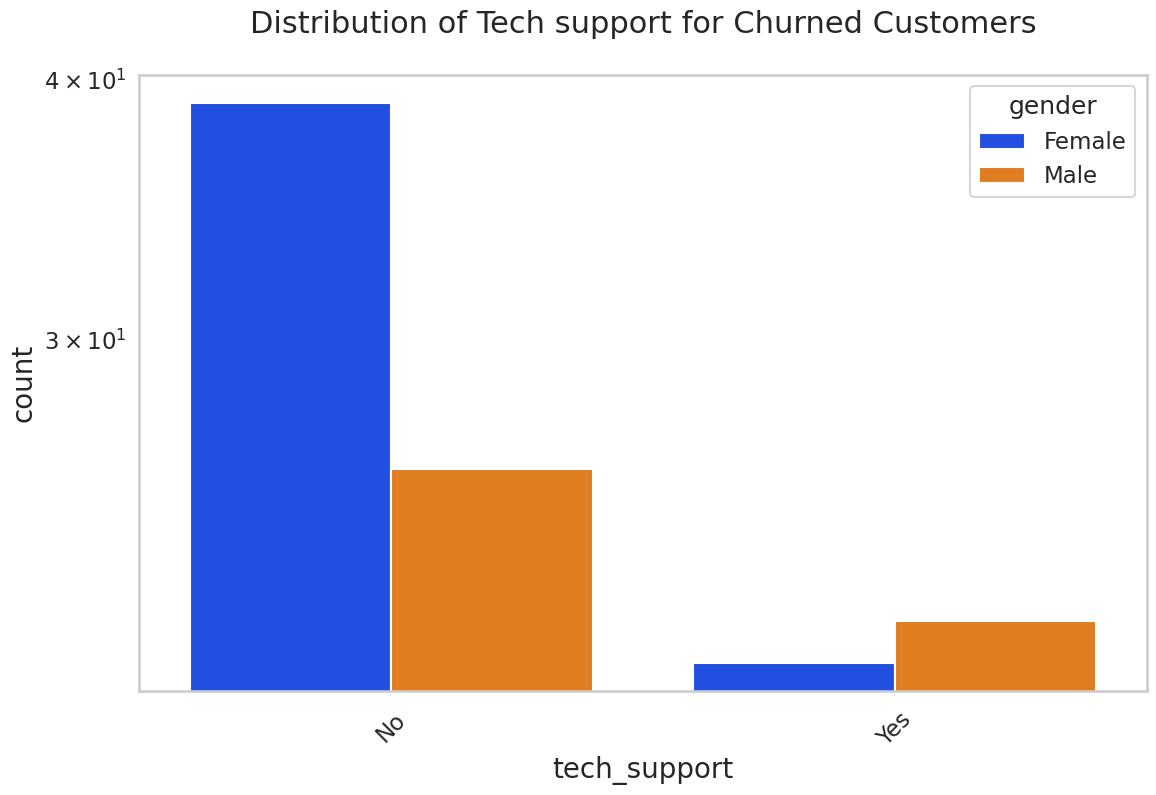

In [89]:
uniplot(new_df1_target1,col='tech_support',title='Distribution of Tech support for Churned Customers',hue='gender')


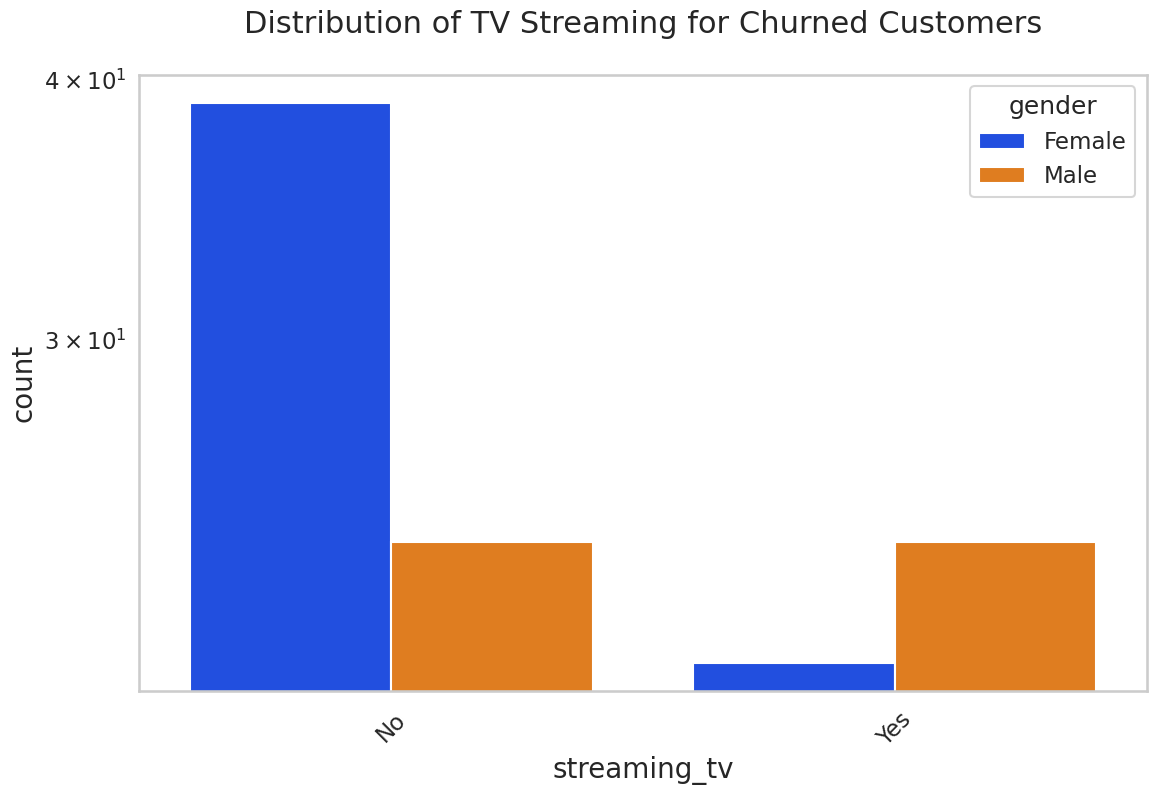

In [91]:
uniplot(new_df1_target1,col='streaming_tv',title='Distribution of TV Streaming for Churned Customers',hue='gender')


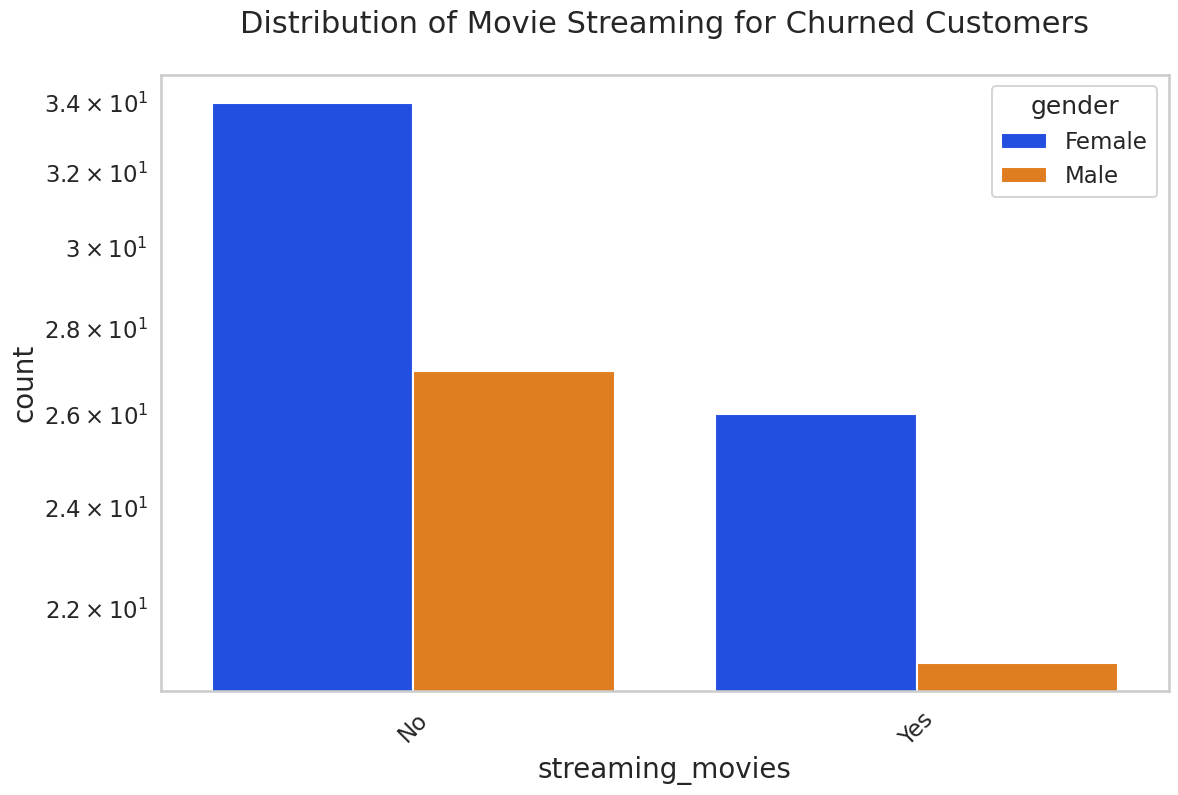

In [93]:
uniplot(new_df1_target1,col='streaming_movies',title='Distribution of Movie Streaming for Churned Customers',hue='gender')


#**CONCLUSION**

The below are some of the insights from this Exploratory Data Analysis:

1. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
2. Tech support & Internet Services - No Tech Support, No Internet Services category are high churners.
3. Streaming Services (TV & MOVIES) - Customers with lesser streaming behaviour churns the most.

In [94]:
tel_churn_dummies.to_csv('tel_churn.csv')